In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

Importing the dataset, it consists of 2 tables: train - table with sales information, store - table with stores information

In [ ]:
rossman_df = pd.read_csv("train.csv", low_memory=False)

In [ ]:
store_df = pd.read_csv("store.csv", low_memory=False)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


In [ ]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store_df[['CompetitionDistance','Promo2']].describe()

,CompetitionDistance,Promo2
count,1112.00,1115.00
mean,5404.90,0.51
std,7663.17,0.50
min,20.00,0.00
25%,717.50,0.00
50%,2325.00,1.00
75%,6882.50,1.00
max,75860.00,1.00


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
rossman_df.drop(rossman_df[rossman_df.Open == 0].index, inplace = True)

In [ ]:
rossman_df.drop(rossman_df[rossman_df.Sales == 0].index, inplace = True)

<Axes: xlabel='Store', ylabel='Count'>

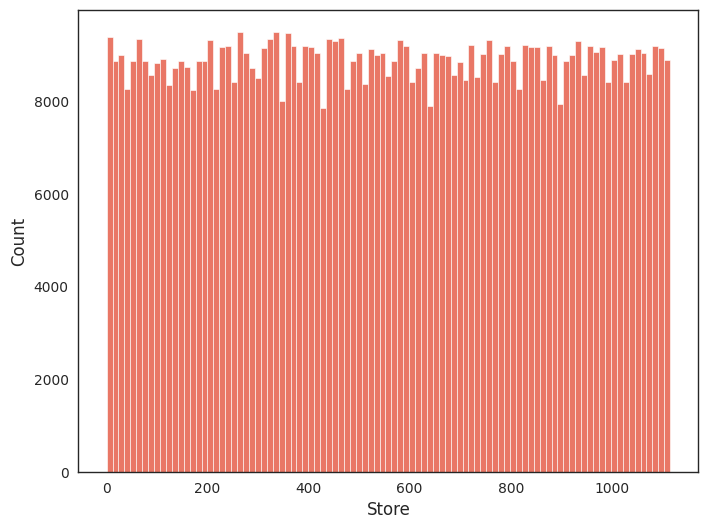

In [ ]:
sns.histplot(rossman_df.Store)

<Axes: xlabel='DayOfWeek', ylabel='Count'>

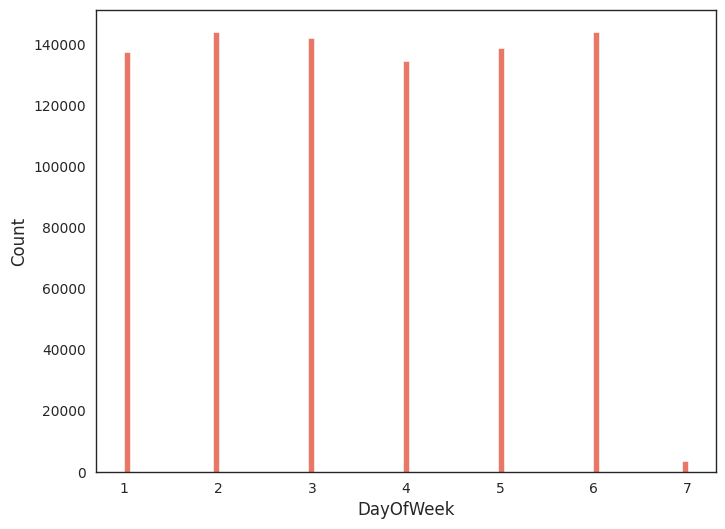

In [ ]:
sns.histplot(rossman_df.DayOfWeek)

<Axes: xlabel='Sales', ylabel='Count'>

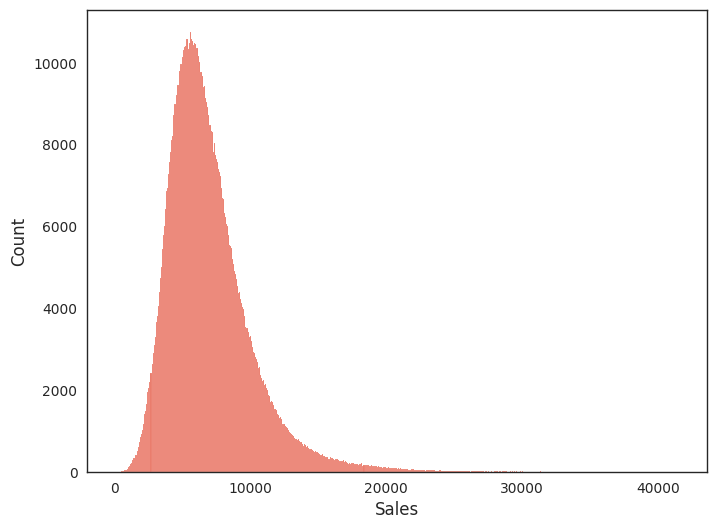

In [ ]:
sns.histplot(rossman_df.Sales)

<Axes: xlabel='Customers', ylabel='Count'>

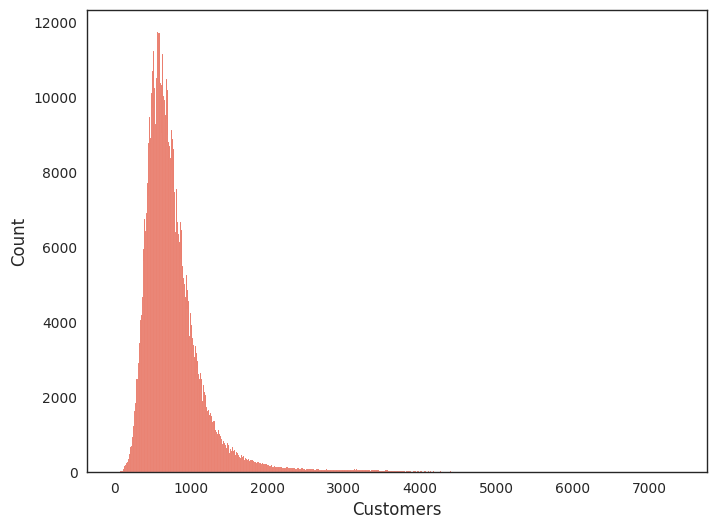

In [ ]:
sns.histplot(rossman_df.Customers)

In [ ]:
rossman_df.Promo.value_counts()

0    467463
1    376875
Name: Promo, dtype: int64

In [ ]:
rossman_df.Promo.value_counts(normalize=True).mul(100).round(2)

0   55.36
1   44.64
Name: Promo, dtype: float64

In [ ]:
rossman_df.SchoolHoliday.value_counts()

0    680893
1    163445
Name: SchoolHoliday, dtype: int64

In [ ]:
rossman_df.SchoolHoliday.value_counts(normalize=True).mul(100).round(2)

0   80.64
1   19.36
Name: SchoolHoliday, dtype: float64

<Axes: xlabel='Store', ylabel='Count'>

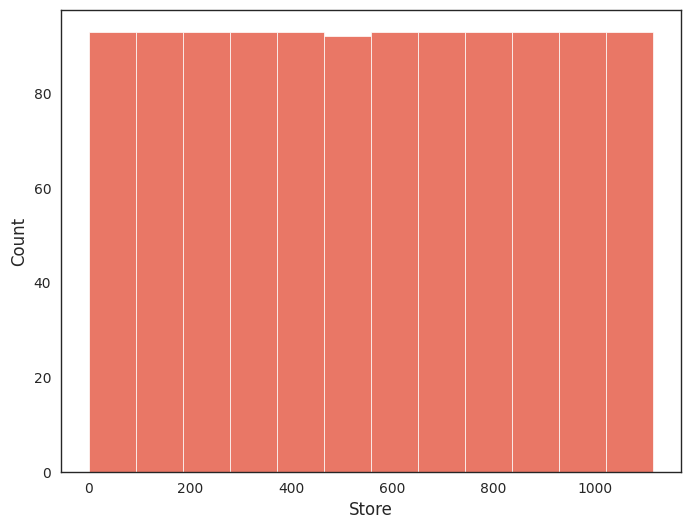

In [ ]:
sns.histplot(store_df.Store)

In [ ]:
#No. Of Stores in the Dataset
store_df.Store.nunique()

1115

<Axes: xlabel='CompetitionDistance', ylabel='Count'>

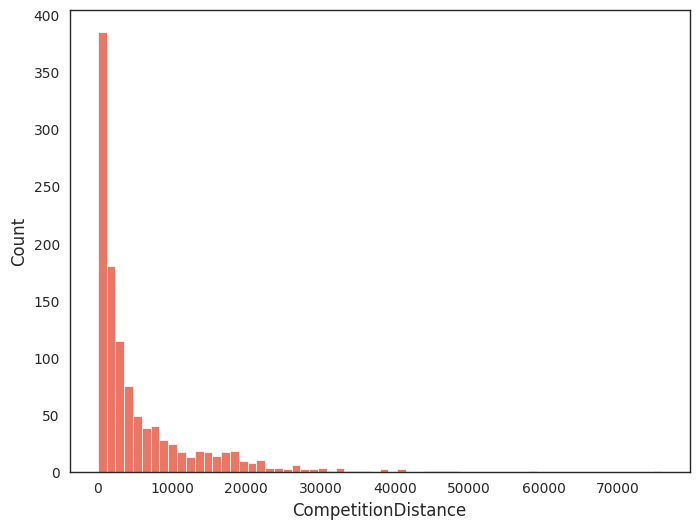

In [ ]:
sns.histplot(store_df.CompetitionDistance)

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Count'>

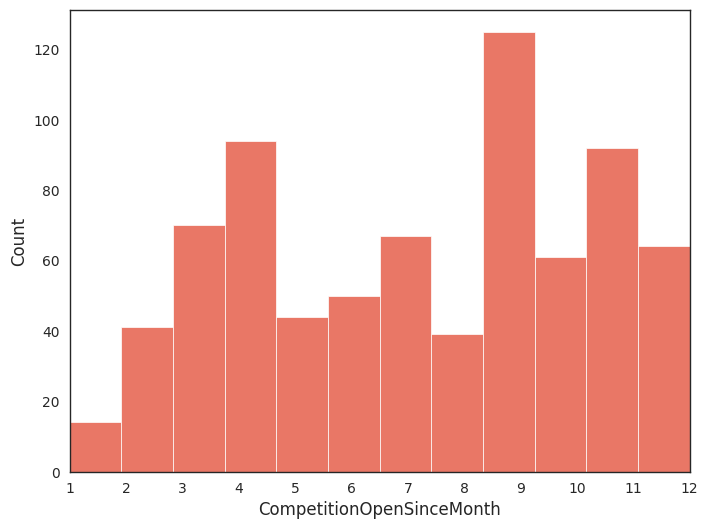

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(1,12)
ax.set_xticks(range(1,13))
sns.histplot(store_df.CompetitionOpenSinceMonth, bins = 12, ax=ax)

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Count'>

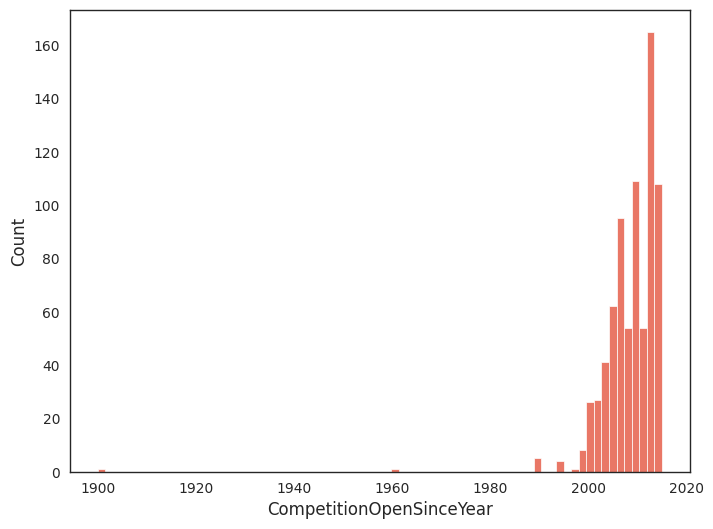

In [ ]:
sns.histplot(store_df.CompetitionOpenSinceYear)

In [ ]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [ ]:
rossman_df.StateHoliday.value_counts(normalize=True).mul(100).round(2)

0   99.89
a    0.08
b    0.02
c    0.01
Name: StateHoliday, dtype: float64

In [ ]:
store_df.Promo2.value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [ ]:
store_df.Promo2.value_counts(normalize=True).mul(100).round(2)

1   51.21
0   48.79
Name: Promo2, dtype: float64

In [ ]:
rossman_df['Date']=pd.to_datetime(rossman_df['Date'])

<Axes: xlabel='Date', ylabel='Count'>

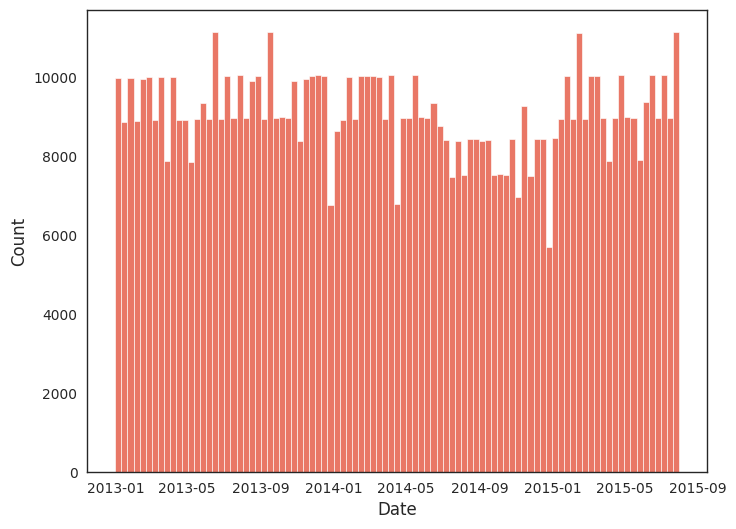

In [ ]:
sns.histplot(rossman_df['Date'])

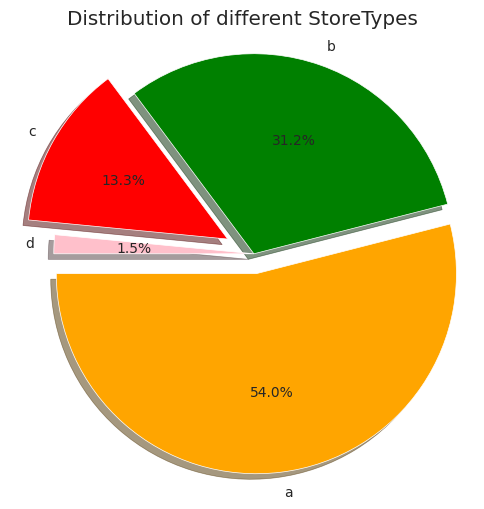

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
df.Assortment.value_counts()

a    444875
c    391254
b      8209
Name: Assortment, dtype: int64

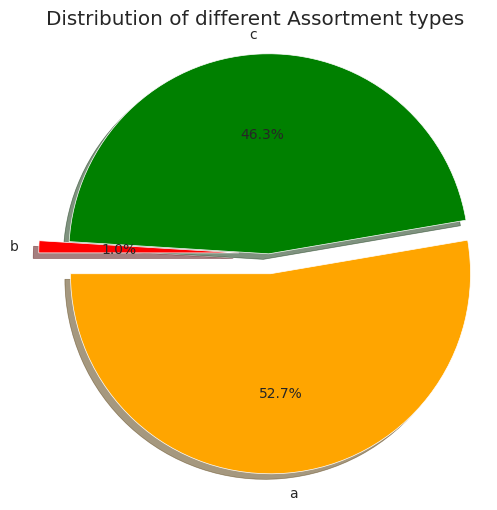

In [ ]:
labels = 'a' , 'c' , 'b'
sizes = df.Assortment.value_counts()
colors = ['orange', 'green' , 'red']
explode = (0.1, 0.0 , 0.15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different Assortment types")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


In [ ]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['DayOfMonth'] = rossman_df['Date'].apply(lambda x: x.day)

<Axes: >

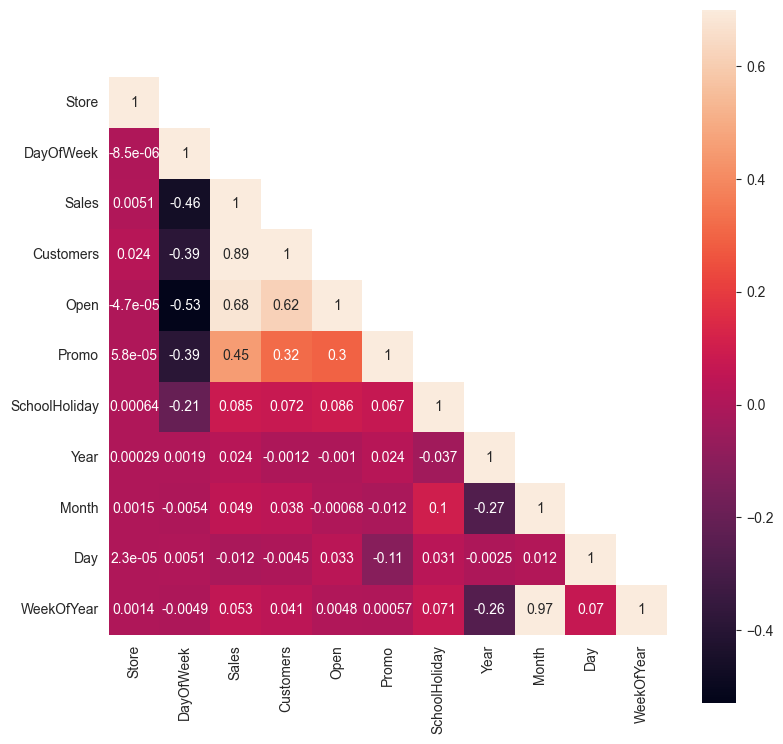

In [ ]:
correlation_map = rossman_df[rossman_df.columns].corr(numeric_only=True)
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

<Axes: xlabel='DayOfWeek', ylabel='count'>

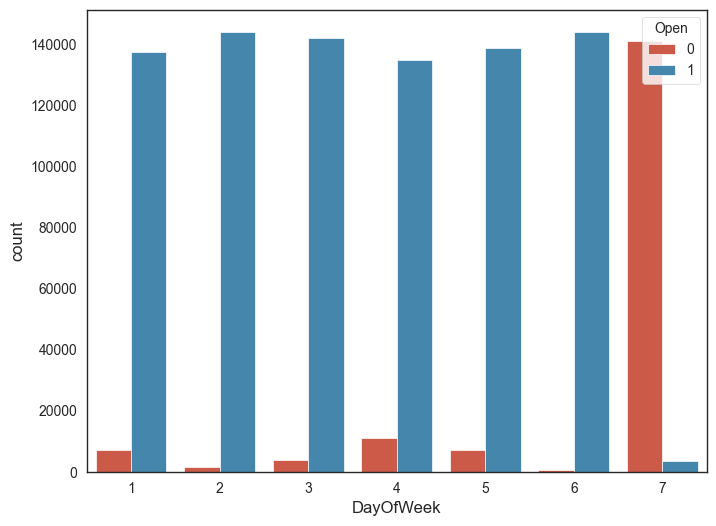

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

In [ ]:
rossman_df.drop(rossman_df[rossman_df.Sales == 0].index, inplace = True)

[Text(0, 0, '757.58'), Text(0, 0, '774.809'), Text(0, 0, '752.686')]

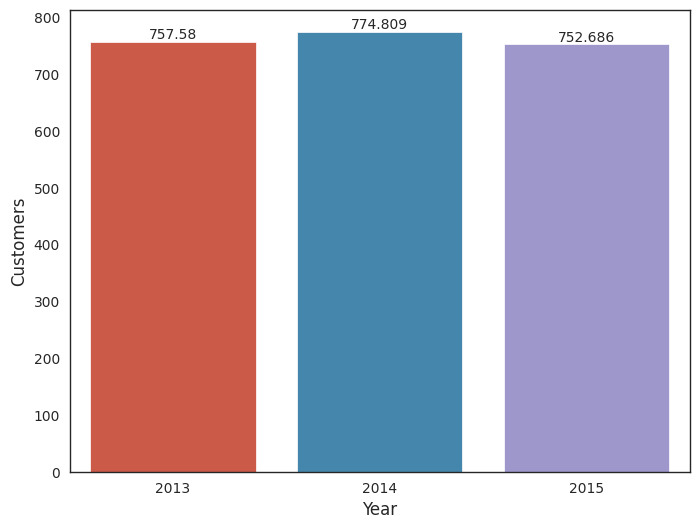

In [ ]:
Promo_sales = pd.DataFrame(rossman_df.groupby('Year').agg({'Sales':'mean'}))
ax = sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])
ax.bar_label(ax.containers[0])
# ax.set_xticklabels(('No promo', 'Promo'))

[Text(0, 0, 'No promo'), Text(1, 0, 'Promo')]

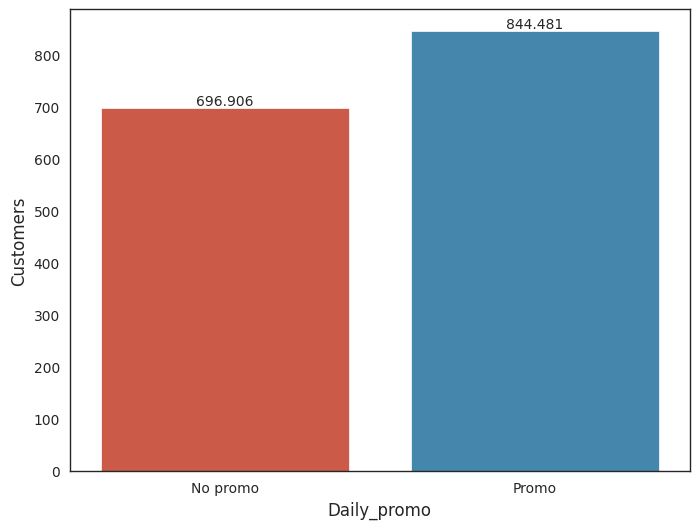

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(df.groupby('Daily_promo').agg({'Sales':'mean'}))
ax = sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(('No promo', 'Promo'))

[Text(0, 0, 'No promo'), Text(1, 0, 'Promo')]

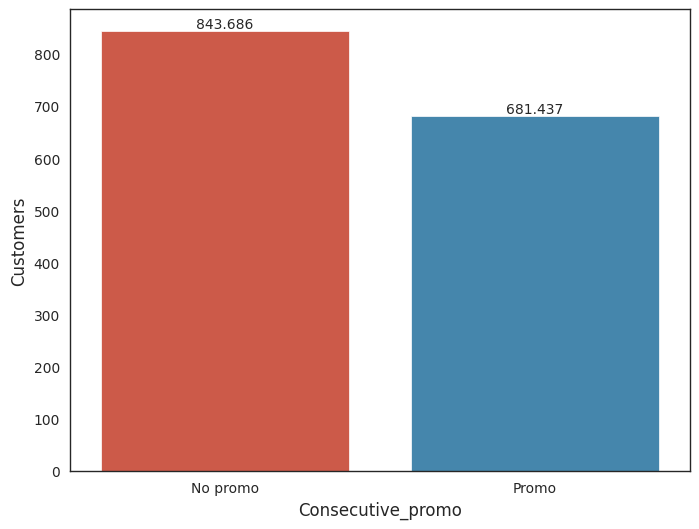

In [ ]:
Promo_sales = pd.DataFrame(df.groupby('Consecutive_promo').agg({'Sales':'mean'}))
ax = sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(('No promo', 'Promo'))

[Text(0, 0, 'No holdiay'), Text(1, 0, 'Holiday')]

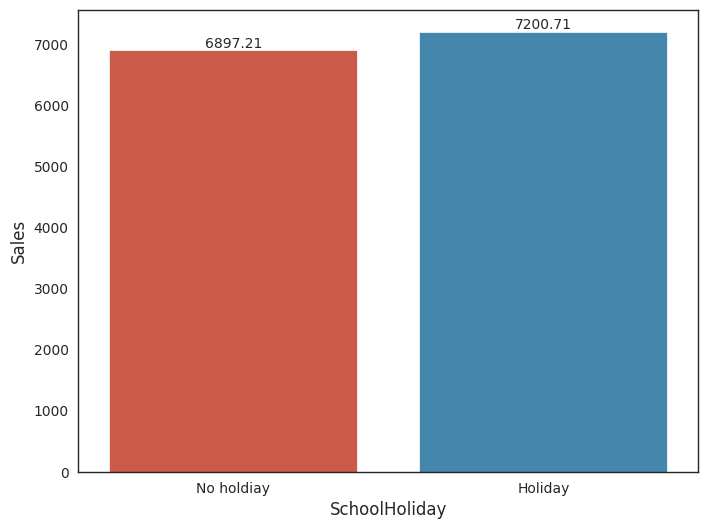

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('SchoolHoliday').agg({'Sales':'mean'}))
ax = sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(('No holdiay', 'Holiday'))

In [ ]:
df = df.rename(columns={"Promo": "Daily_promo", 'Promo2': 'Consecutive_promo'})

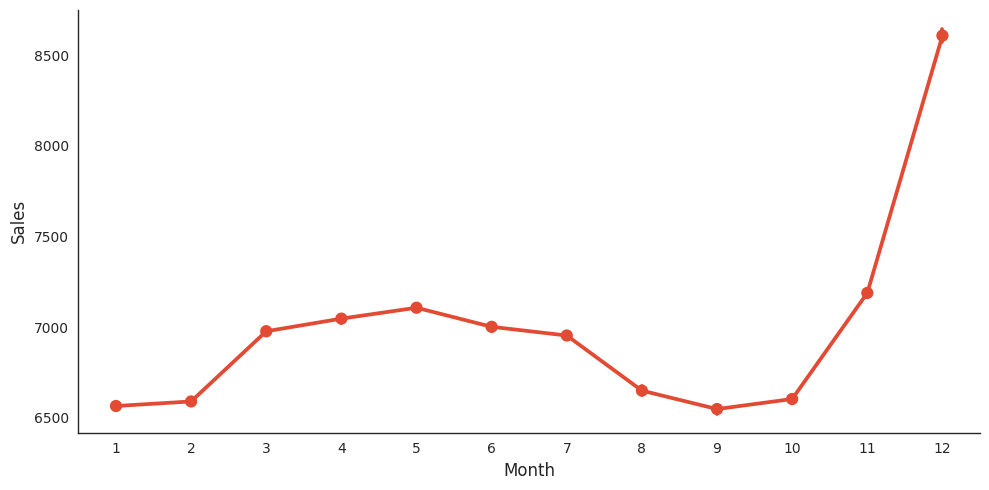

In [ ]:
sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)

<Axes: xlabel='DayOfMonth', ylabel='Customers'>

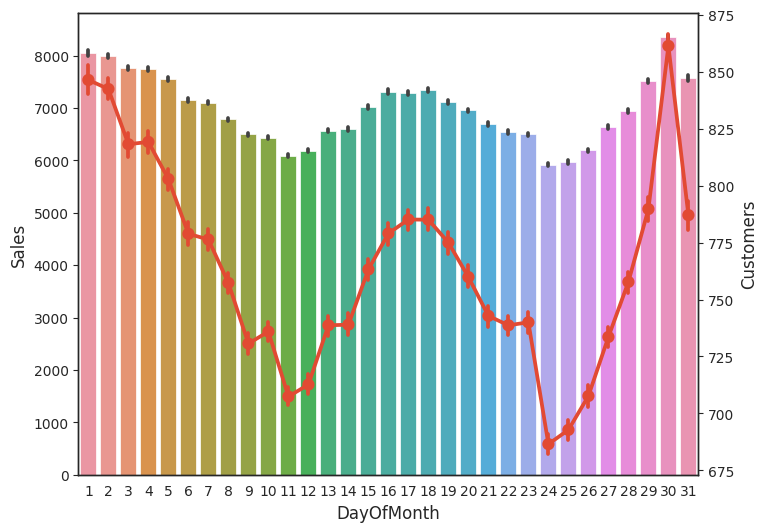

In [ ]:
ax = plt.subplot()
ax2 = ax.twinx()
sns.barplot(ax=ax, x="DayOfMonth" ,y = "Sales" , data=rossman_df)
sns.pointplot(x="DayOfMonth" ,y = "Customers", ax = ax2, data=rossman_df)

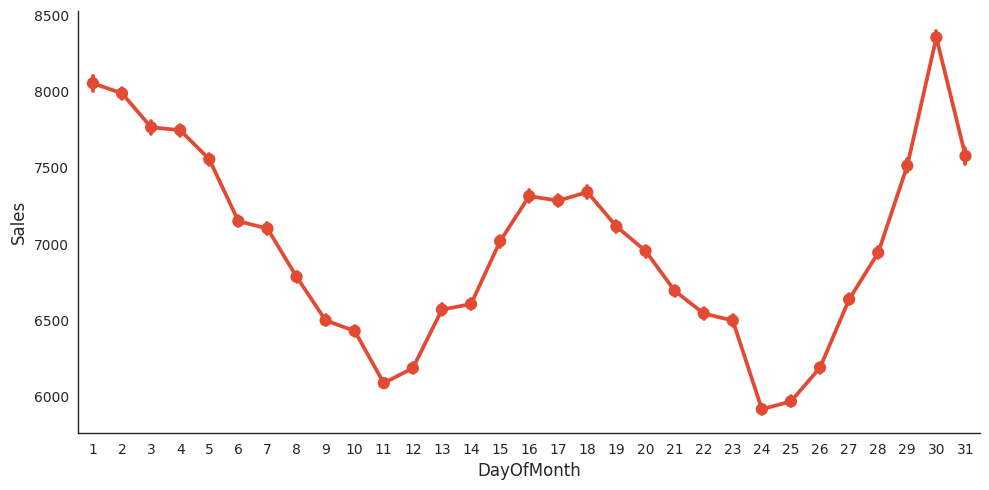

In [ ]:
sns.catplot(x="DayOfMonth" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)

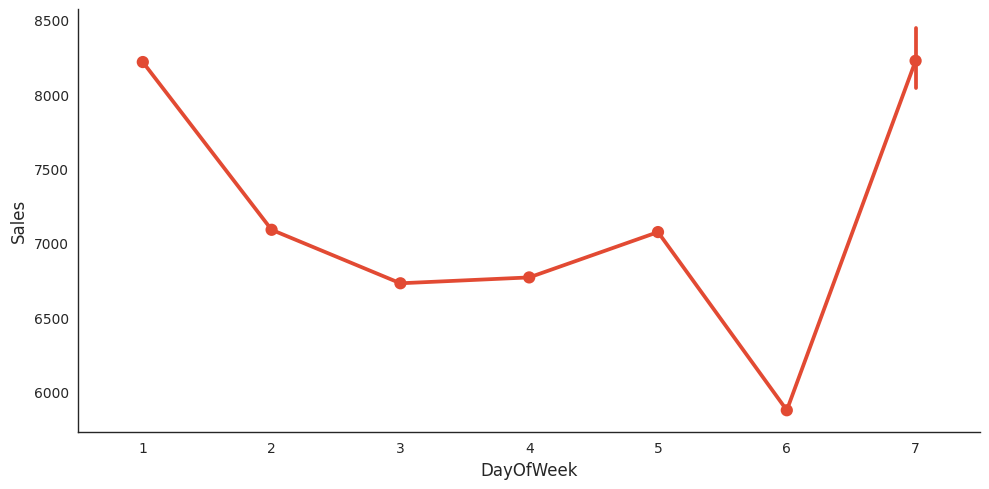

In [ ]:
sns.catplot(x="DayOfWeek" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)

In [ ]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

SchoolHoliday
0    680893
1    163445
Name: count, dtype: int64

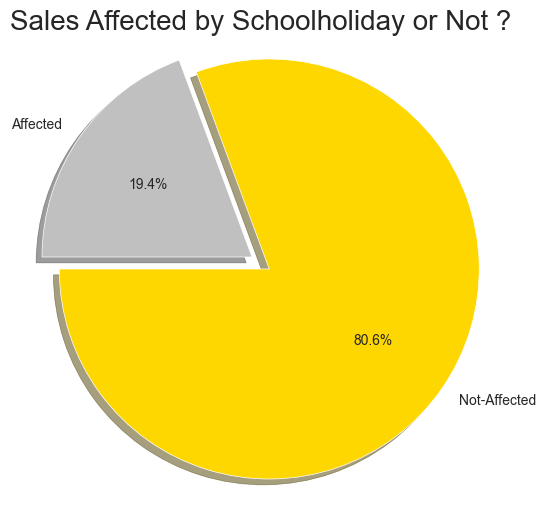

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
rossman_df.Open.value_counts()

Open
1    844338
Name: count, dtype: int64

In [ ]:
rossman_df.StateHoliday.value_counts()

StateHoliday
0    843428
a       694
b       145
c        71
Name: count, dtype: int64

In [ ]:
rossman_df.drop(columns=['StateHoliday', 'Open'], inplace=True)

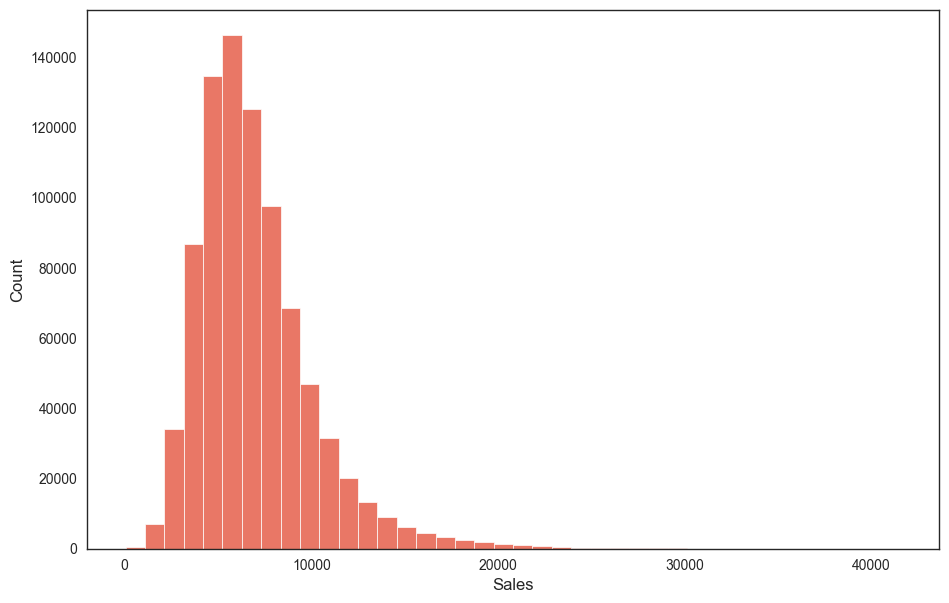

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(rossman_df['Sales'], kde = False,bins=40);

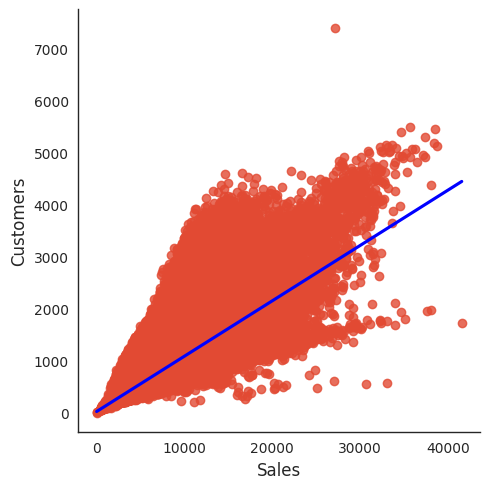

In [ ]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

In [ ]:
def dist_category(row):
  if row['CompetitionDistance'] < 100:
    return 100
  elif 100 <= row['CompetitionDistance'] < 200:
    return 200
  elif 200 <= row['CompetitionDistance'] < 300:
    return 300
  elif 300<= row['CompetitionDistance'] < 400:
    return 400
  elif 400<= row['CompetitionDistance'] < 500:
    return 500
  elif 500<= row['CompetitionDistance'] < 600:
    return 600
  elif 600<= row['CompetitionDistance'] < 700:
    return 700
  elif 700<= row['CompetitionDistance'] < 800:
    return 800
  elif 800<= row['CompetitionDistance'] < 900:
    return 900
  elif 900<= row['CompetitionDistance'] < 1000:
    return 1000
  elif 1000 <= row['CompetitionDistance'] < 2000:
    return 2000
  elif 2000 <= row['CompetitionDistance'] < 3000:
    return 3000
  elif 3000 <= row['CompetitionDistance'] < 4000:
    return 4000
  elif 4000 <= row['CompetitionDistance'] < 5000:
    return 5000
  elif 5000 <= row['CompetitionDistance'] < 6000:
    return 6000
  elif 6000 <= row['CompetitionDistance'] < 7000:
    return 7000
  elif 7000 <= row['CompetitionDistance'] < 8000:
    return 8000
  elif 8000 <= row['CompetitionDistance'] < 9000:
    return 9000
  elif 9000 <= row['CompetitionDistance'] < 10000:
    return 10000
  else:
    return '>10000'

df['Competition_Distance_Category'] = df.apply(dist_category, axis=1)

[Text(0, 0, '100'),
 Text(1, 0, '200'),
 Text(2, 0, '300'),
 Text(3, 0, '400'),
 Text(4, 0, '500'),
 Text(5, 0, '600'),
 Text(6, 0, '700'),
 Text(7, 0, '800'),
 Text(8, 0, '900'),
 Text(9, 0, '1000'),
 Text(10, 0, '2000'),
 Text(11, 0, '3000'),
 Text(12, 0, '4000'),
 Text(13, 0, '5000'),
 Text(14, 0, '6000'),
 Text(15, 0, '7000'),
 Text(16, 0, '8000'),
 Text(17, 0, '9000'),
 Text(18, 0, '10000'),
 Text(19, 0, '>10000')]

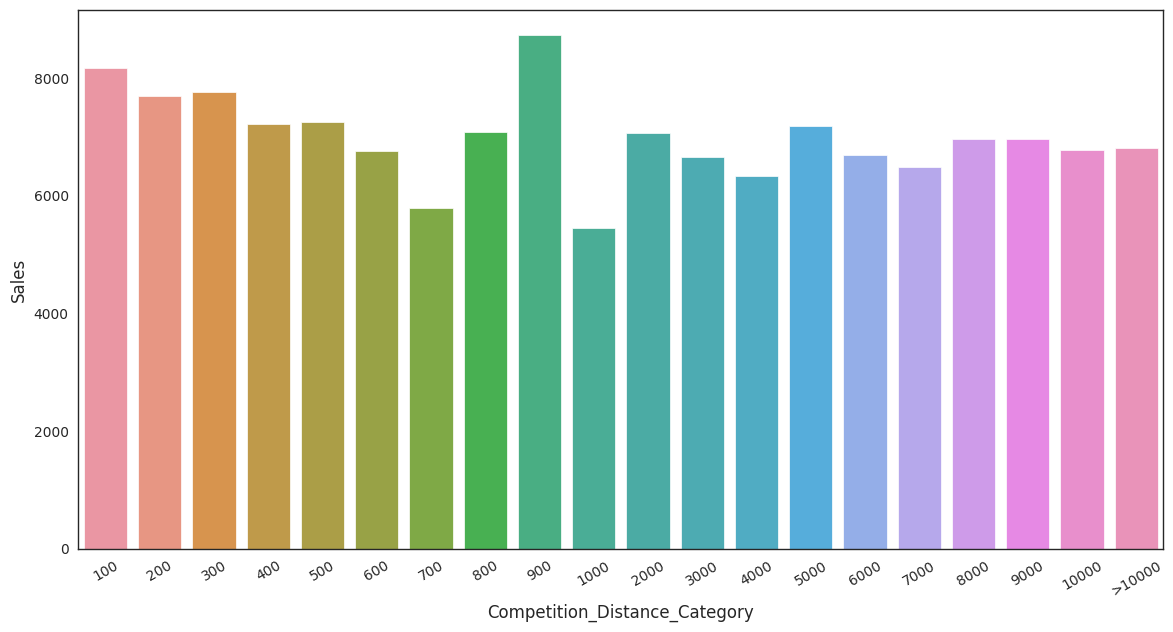

In [ ]:
mean_sales_by_distance = df.groupby('Competition_Distance_Category')['Sales'].mean().reset_index()
plt.figure(figsize=(14, 7))
comp_plot = sns.barplot(data=mean_sales_by_distance, x='Competition_Distance_Category', y='Sales')
comp_plot.set_xticklabels(comp_plot.get_xticklabels(), rotation=30)

[Text(0, 0, '100'),
 Text(1, 0, '200'),
 Text(2, 0, '300'),
 Text(3, 0, '400'),
 Text(4, 0, '500'),
 Text(5, 0, '600'),
 Text(6, 0, '700'),
 Text(7, 0, '800'),
 Text(8, 0, '900'),
 Text(9, 0, '1000'),
 Text(10, 0, '2000'),
 Text(11, 0, '3000'),
 Text(12, 0, '4000'),
 Text(13, 0, '5000'),
 Text(14, 0, '6000'),
 Text(15, 0, '7000'),
 Text(16, 0, '8000'),
 Text(17, 0, '9000'),
 Text(18, 0, '10000'),
 Text(19, 0, '>10000')]

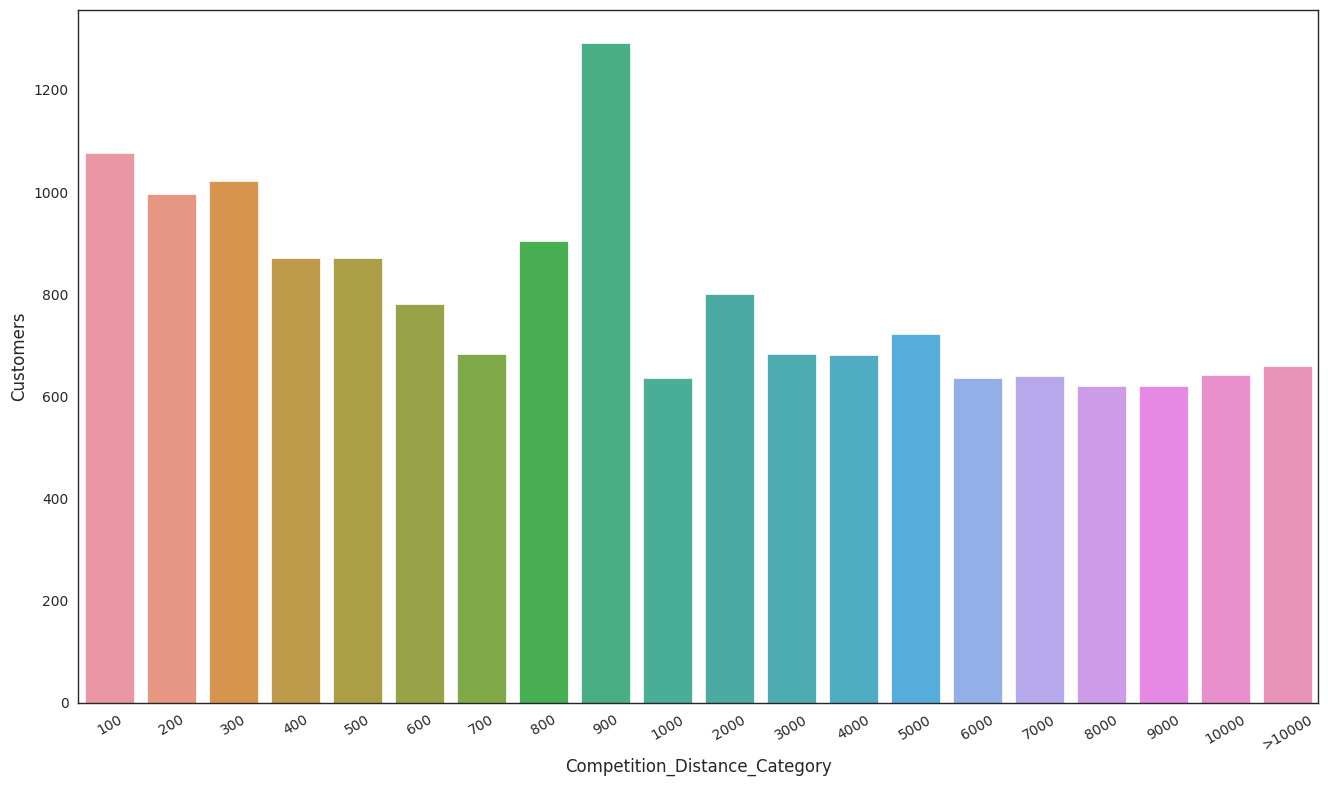

In [ ]:
mean_Customers_by_distance = df.groupby('Competition_Distance_Category')['Customers'].mean().reset_index()
plt.figure(figsize=(16, 9))
comp_plot = sns.barplot(data=mean_Customers_by_distance, x='Competition_Distance_Category', y='Customers')
comp_plot.set_xticklabels(comp_plot.get_xticklabels(), rotation=30)

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

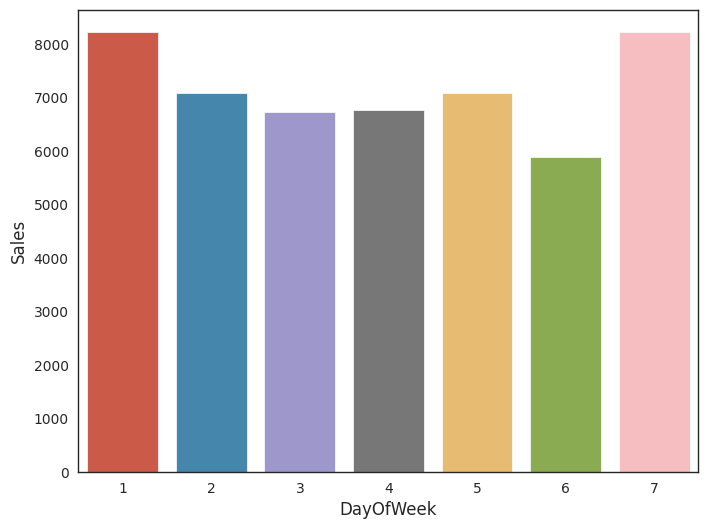

In [ ]:
#Impact of the day of the week on sales
DayOfWeek_sales = pd.DataFrame(rossman_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=DayOfWeek_sales.index, y = DayOfWeek_sales['Sales'])

<Axes: xlabel='Year', ylabel='Sales'>

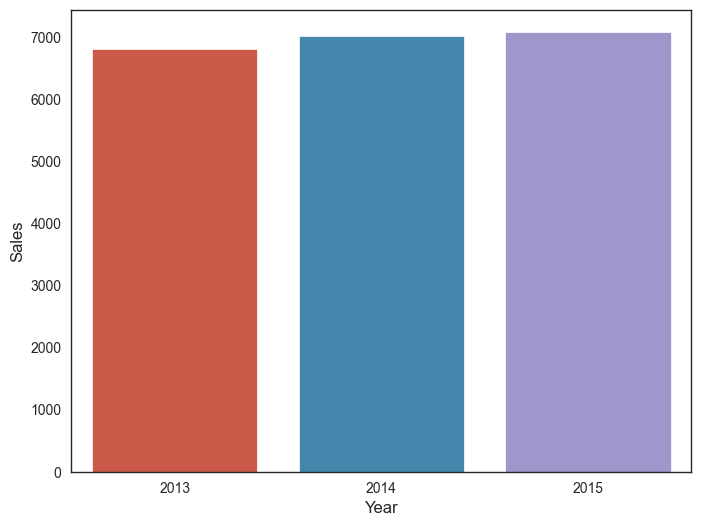

In [ ]:
#Impact of the year on sales
Year_sales = pd.DataFrame(rossman_df.groupby('Year').agg({'Sales':'mean'}))
sns.barplot(x=Year_sales.index, y = Year_sales['Sales'])

C:\Users\22300293\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


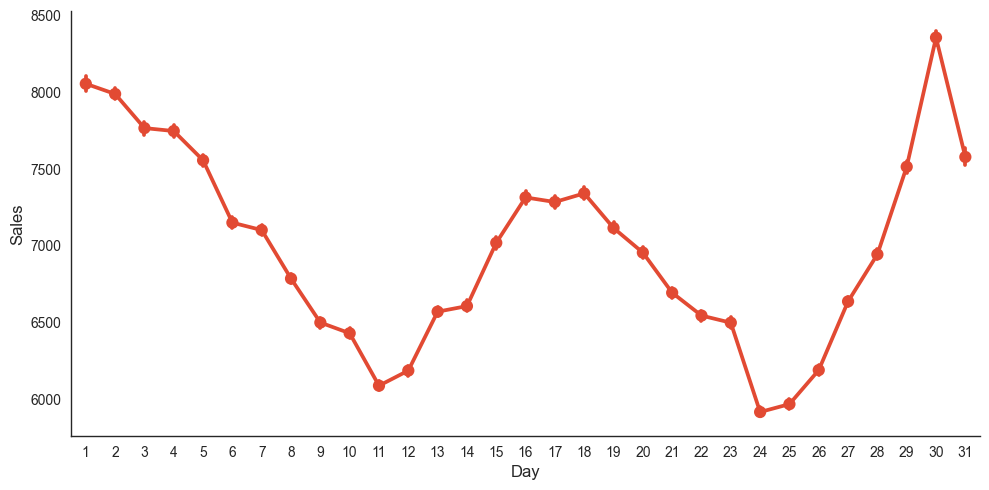

In [ ]:
sns.catplot(x="Day" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)

C:\Users\22300293\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


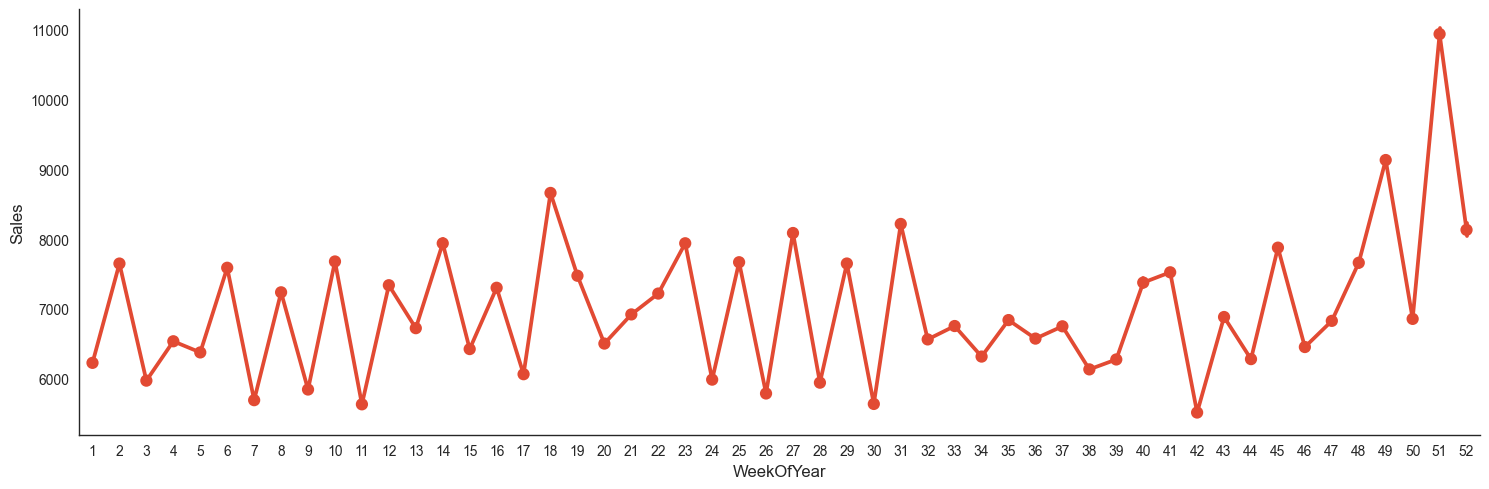

In [ ]:
sns.catplot(x="WeekOfYear" ,y = "Sales" , data=rossman_df, kind="point", aspect=3)

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

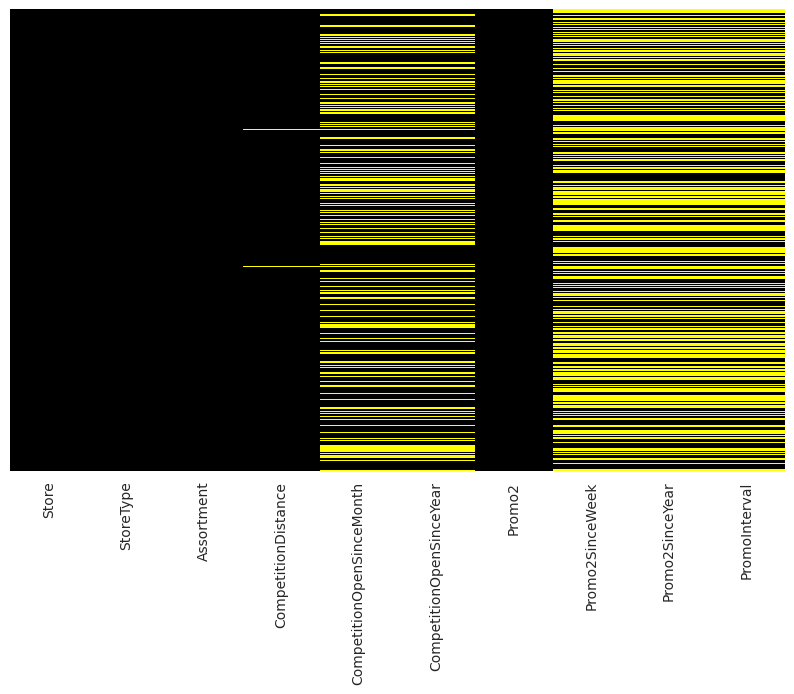

In [ ]:

# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

In [ ]:
df.StoreType.value_counts()

a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64

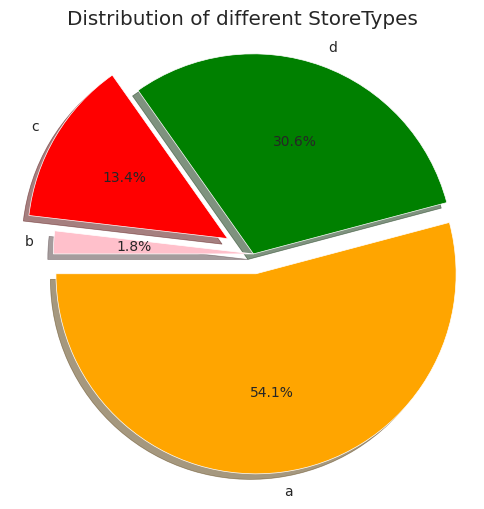

In [ ]:
labels = 'a' , 'd' , 'c' , 'b'
sizes = df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [ ]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
# replace missing values in CompetitionDistance with mode for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.mode(), inplace=True)

[Text(0, 0, '457042'),
 Text(0, 0, '15560'),
 Text(0, 0, '112968'),
 Text(0, 0, '258768')]

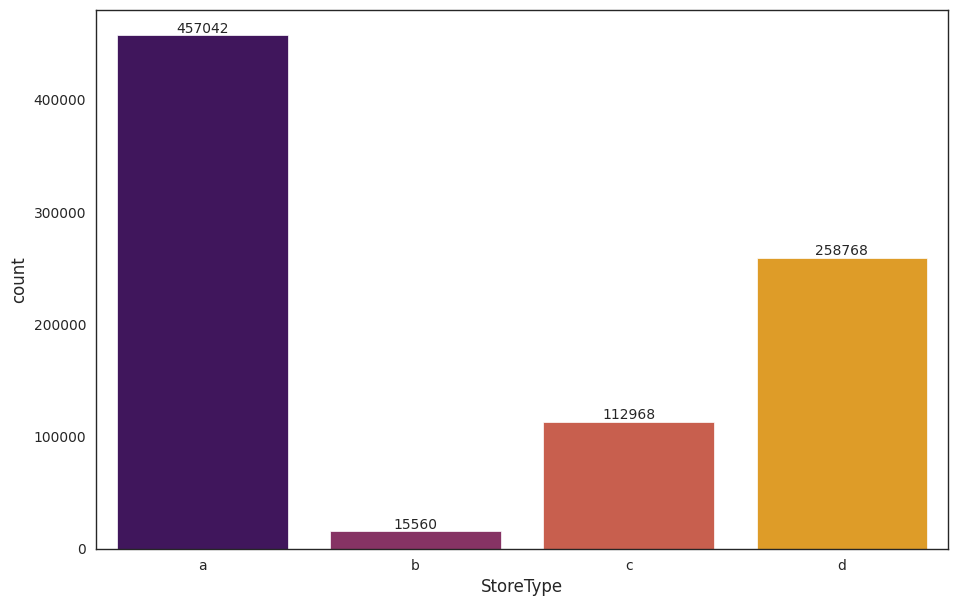

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',data=df,palette="inferno", order = ['a', 'b', 'c', 'd'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '6925.7'),
 Text(0, 0, '10233.4'),
 Text(0, 0, '6933.13'),
 Text(0, 0, '6822.3')]

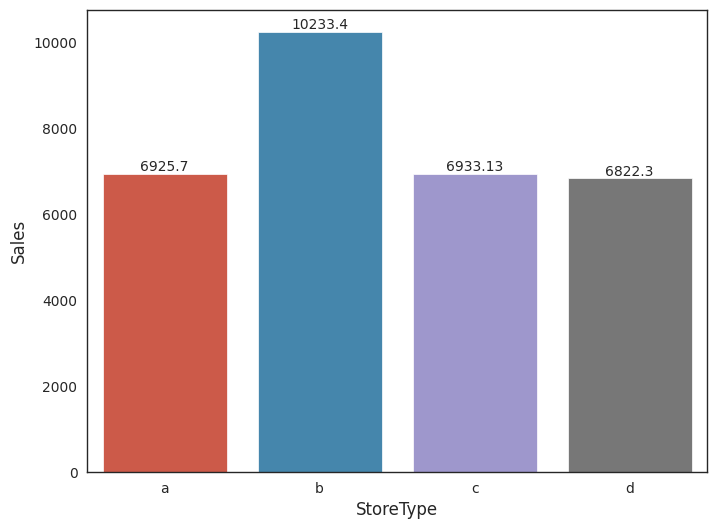

In [ ]:
Assort_sales = pd.DataFrame(df.groupby('StoreType').agg({'Sales':'mean'}))
ax = sns.barplot(data = Assort_sales, x= Assort_sales.index, y = Assort_sales['Sales'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '795.422'),
 Text(0, 0, '2022.21'),
 Text(0, 0, '815.538'),
 Text(0, 0, '606.354')]

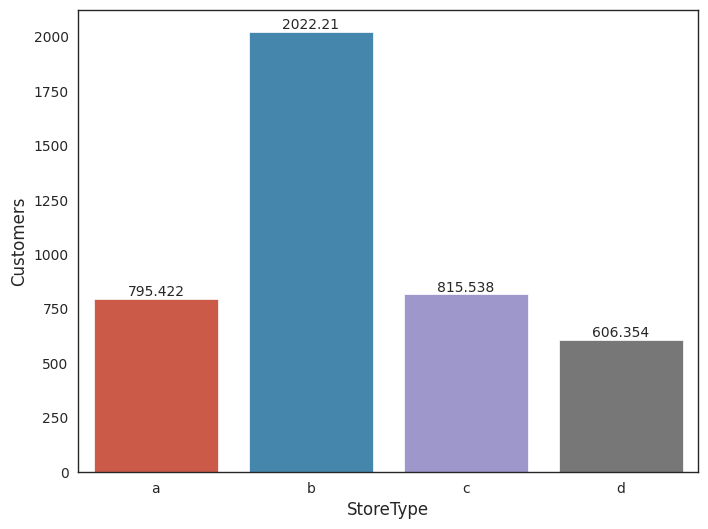

In [ ]:
Assort_customers = pd.DataFrame(df.groupby('StoreType').agg({'Customers':'mean'}))
ax = sns.barplot(x= Assort_customers.index, y = Assort_customers['Customers'])
ax.bar_label(ax.containers[0])

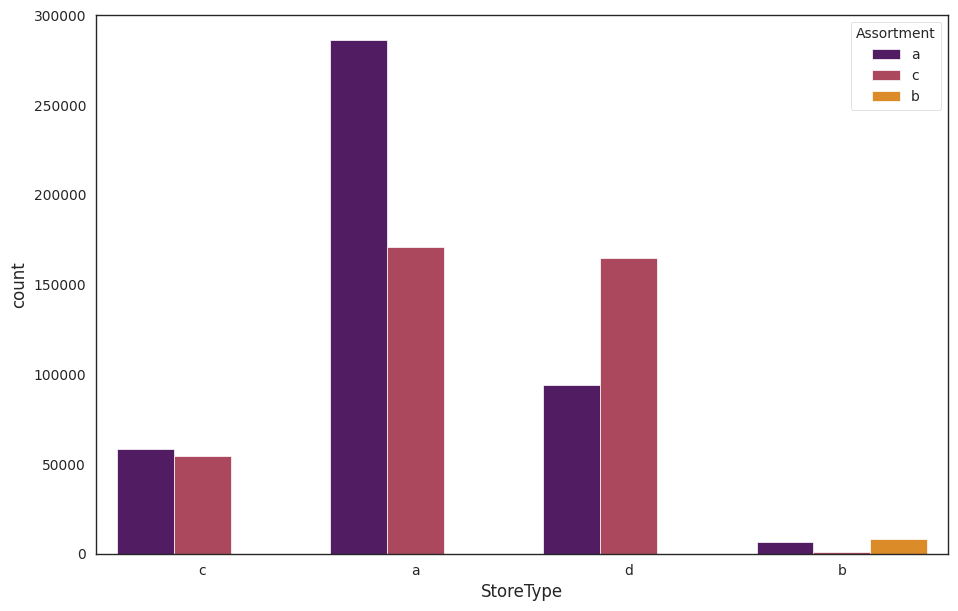

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=df,palette="inferno")

[Text(0, 0, '6621.52'), Text(0, 0, '8642.5'), Text(0, 0, '7300.84')]

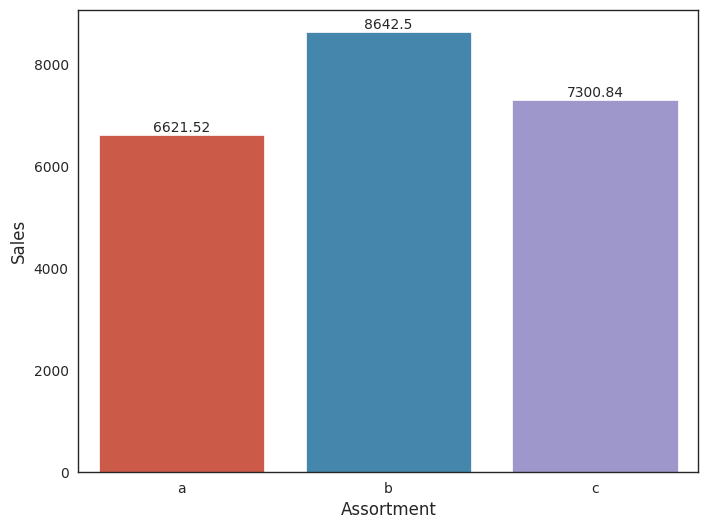

In [ ]:
Assort_sales = pd.DataFrame(df.groupby('Assortment').agg({'Sales':'mean'}))
ax = sns.barplot(data = Assort_sales, x= Assort_sales.index, y = Assort_sales['Sales'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '748.001'), Text(0, 0, '2067.55'), Text(0, 0, '752.203')]

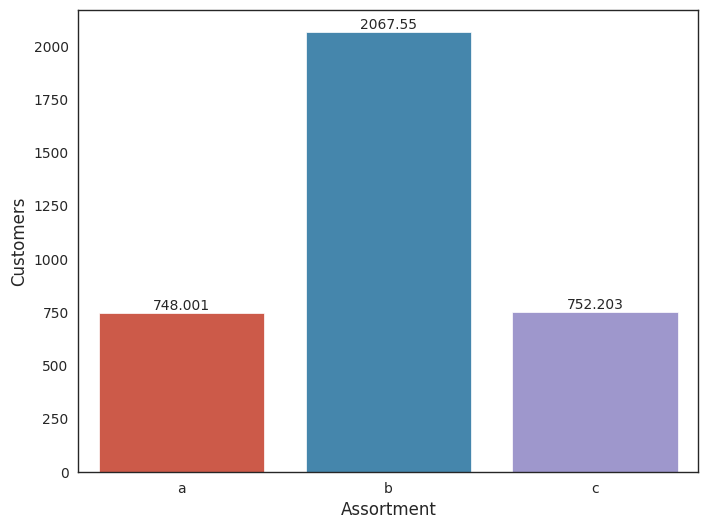

In [ ]:
Assort_sales = pd.DataFrame(df.groupby('Assortment').agg({'Customers':'mean'}))
ax = sns.barplot(data = Assort_sales, x= Assort_sales.index, y = Assort_sales['Customers'])
ax.bar_label(ax.containers[0])

In [ ]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.00,12.00,2013.00,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.00,10.00,2014.00,0,NaN,NaN,NaN


In [ ]:
df = df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],axis=1)

In [ ]:
df

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,Promo2
0,5,5263,555,1,0,1,2015,7,31,c,a,1270.00,0
1,5,6064,625,1,0,1,2015,7,31,a,a,570.00,1
2,5,8314,821,1,0,1,2015,7,31,a,a,14130.00,1
3,5,13995,1498,1,0,1,2015,7,31,c,c,620.00,0
4,5,4822,559,1,0,1,2015,7,31,a,a,29910.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,2,3375,566,0,a,1,2013,1,1,b,a,150.00,0
844334,2,10765,2377,0,a,1,2013,1,1,b,b,860.00,0
844335,2,5035,1248,0,a,1,2013,1,1,b,b,840.00,1
844336,2,4491,1039,0,a,1,2013,1,1,b,b,1430.00,0


In [ ]:
df = df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
df = df.astype({'StateHoliday':'int'})

<Axes: >

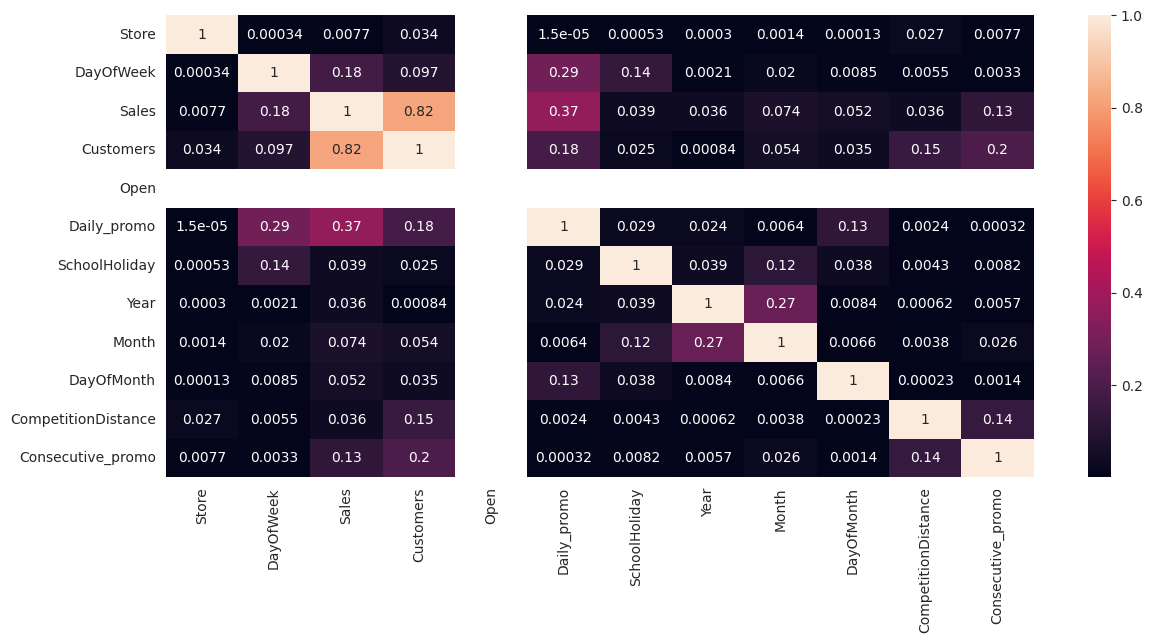

In [ ]:
plt.subplots(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True).abs(), annot=True)

In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

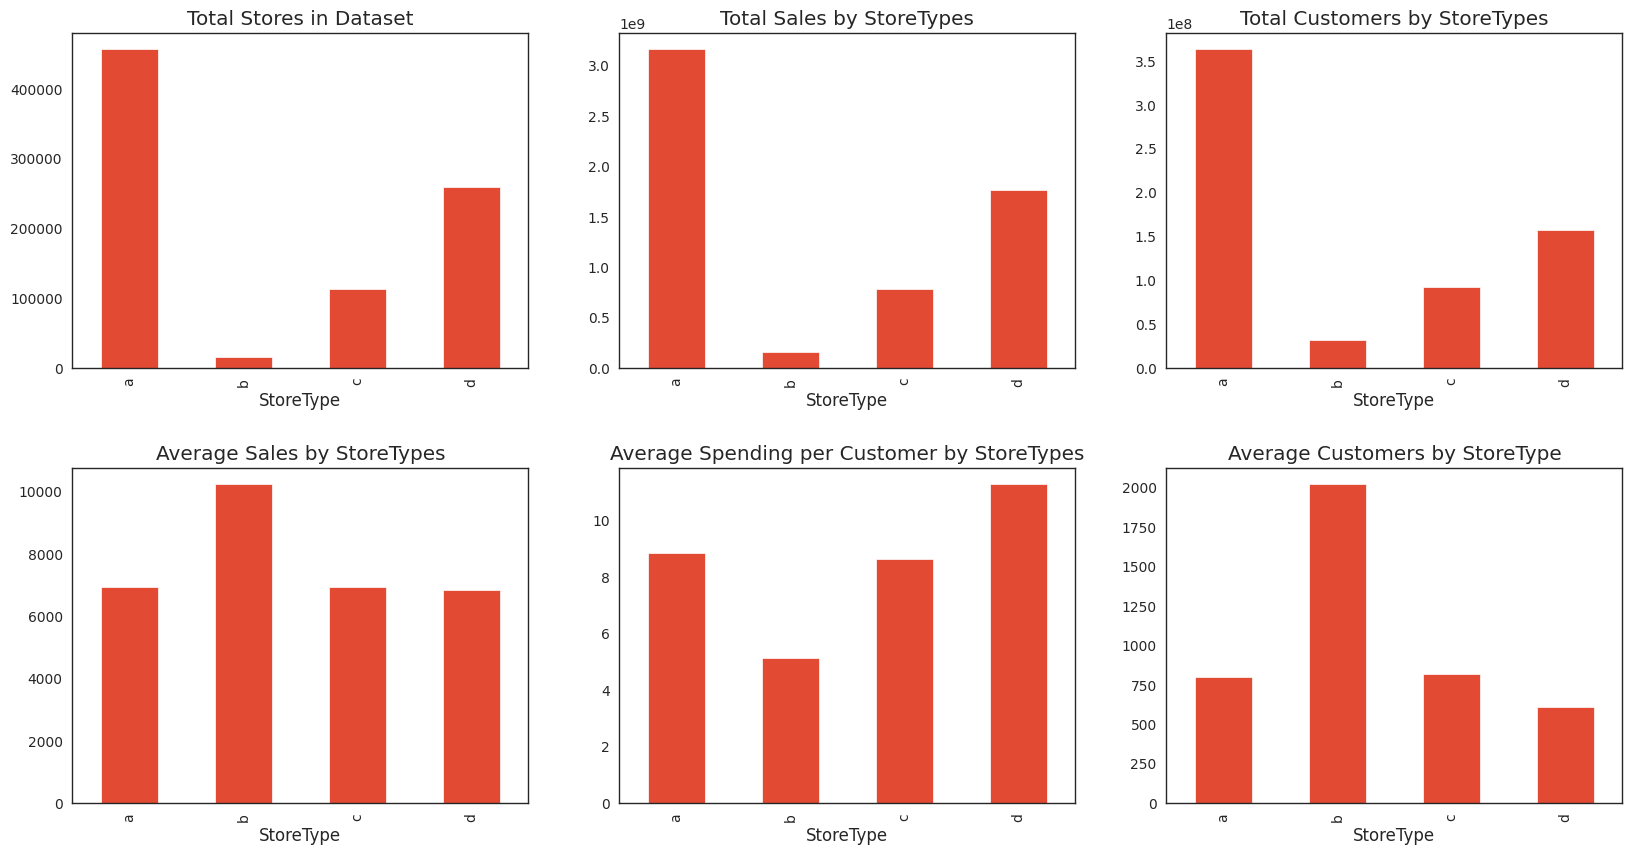

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total Stores in Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales by StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total Customers by StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales by StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer by StoreTypes")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers by StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

C:\Users\22300293\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


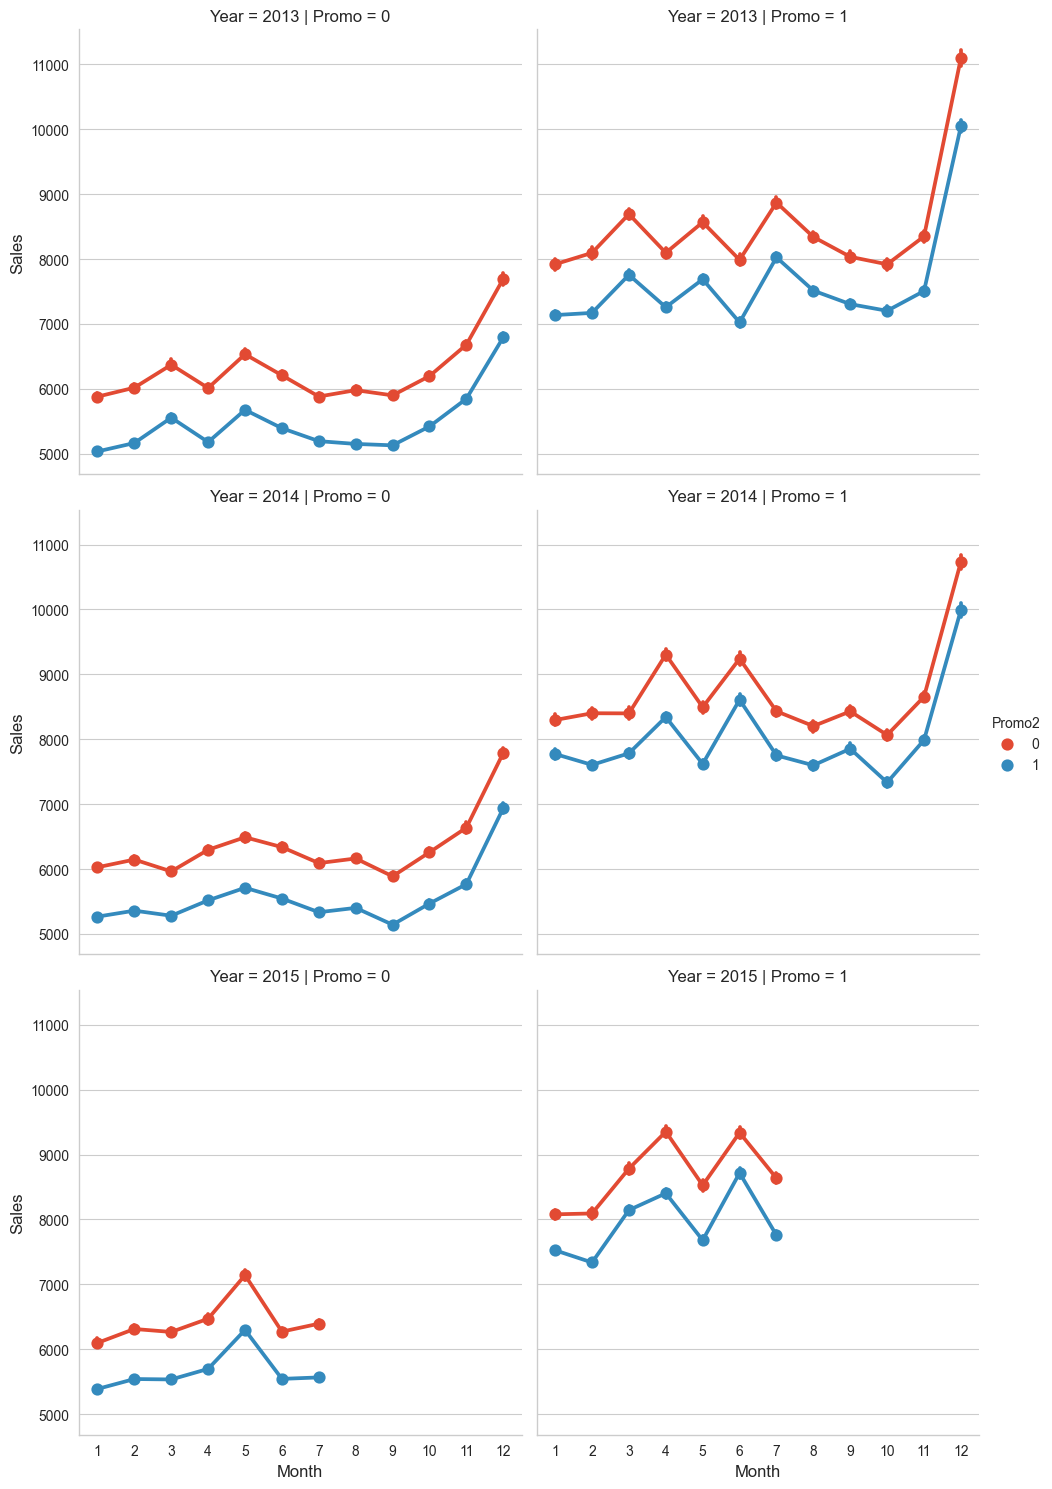

In [ ]:
sns.catplot(data = df, x ="Month", y = "Sales",
               kind = 'point',
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2).

C:\Users\22300293\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


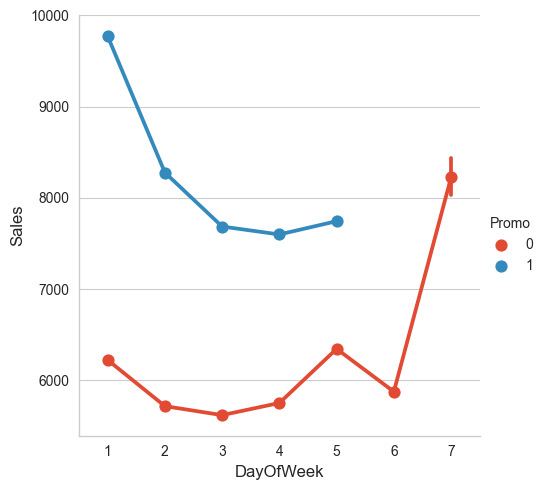

In [ ]:
sns.catplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo", kind='point')

[Text(0.5, 1.0, 'Total Sales by Day of the week')]

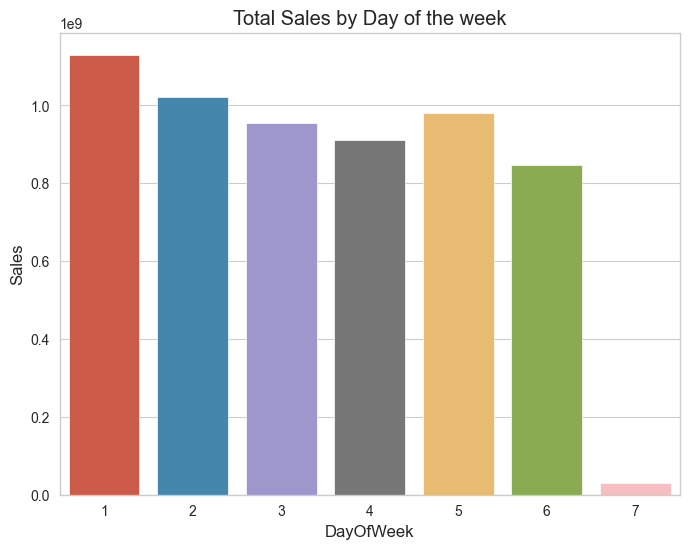

In [ ]:
#Total sales by Day of the week
DayOfWeek_sales = pd.DataFrame(df.groupby('DayOfWeek').agg({'Sales':'sum'}))
sns.barplot(x=DayOfWeek_sales.index, y = DayOfWeek_sales['Sales']).set(title='Total Sales by Day of the week')

In [ ]:
df[df.DayOfWeek == 7].Store.nunique()

33

C:\Users\22300293\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


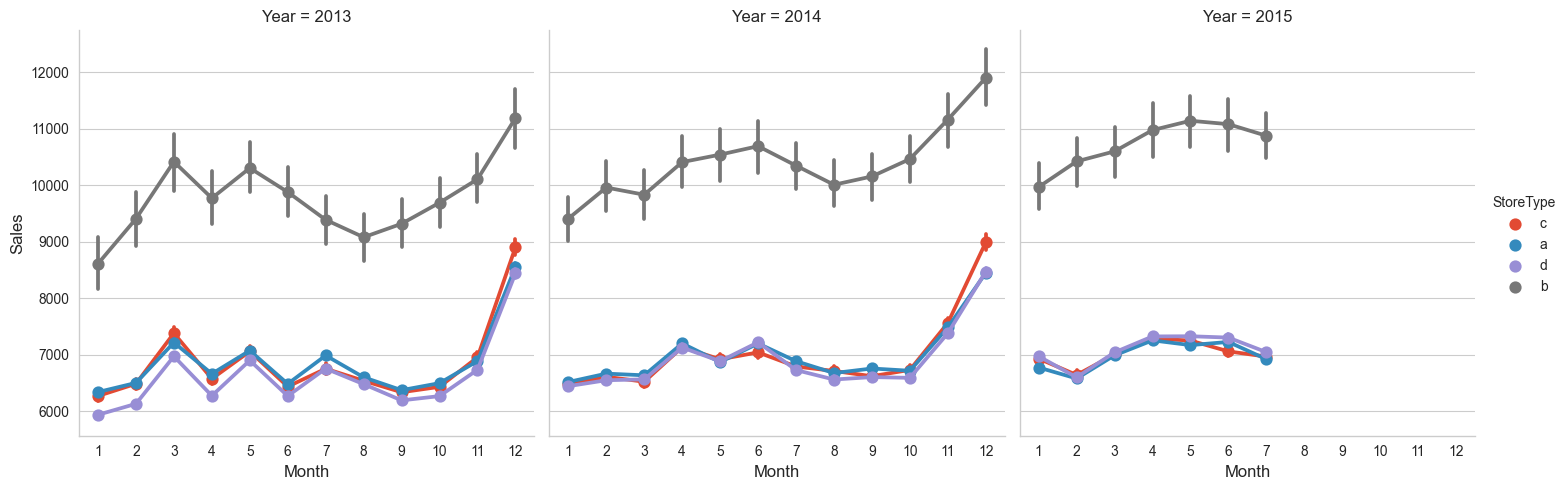

In [ ]:
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType", kind='point')
# Yes, we can see seasonalities, but not trends. The sales stay constant yearly.

In [ ]:
df.CompetitionDistance.describe()

count    842152.000000
mean       5458.156627
std        7809.573181
min          20.000000
25%         710.000000
50%        2320.000000
75%        6890.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

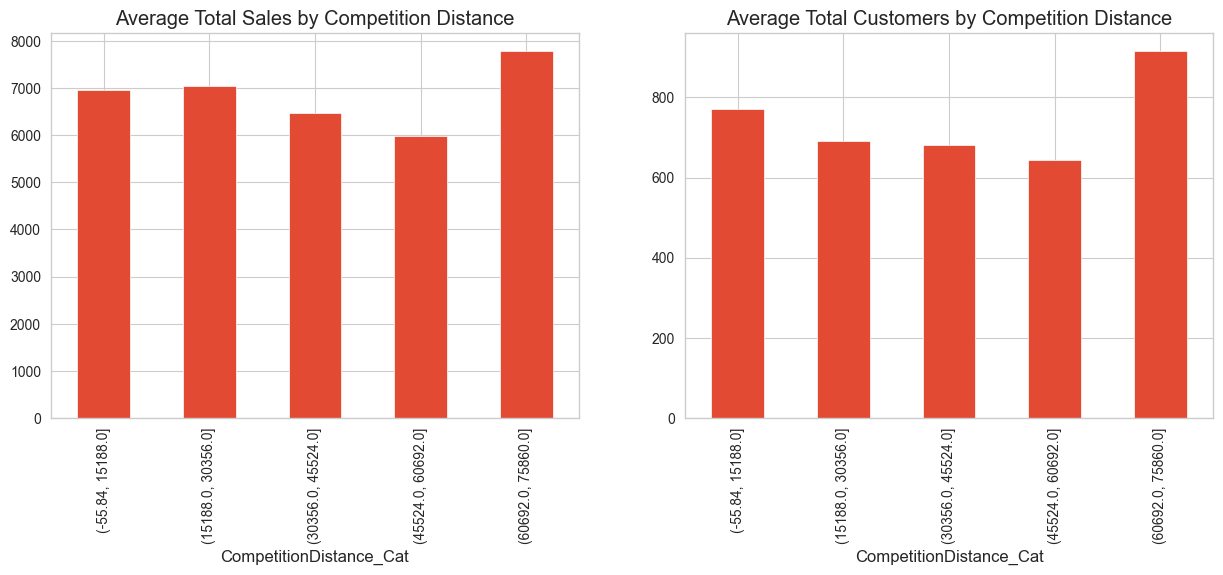

In [ ]:
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competitors are very far away, stores perform better (sales and customers)

In [ ]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,a,a,29910.0,0


[Text(0.5, 0, 'CompetitionDistance')]

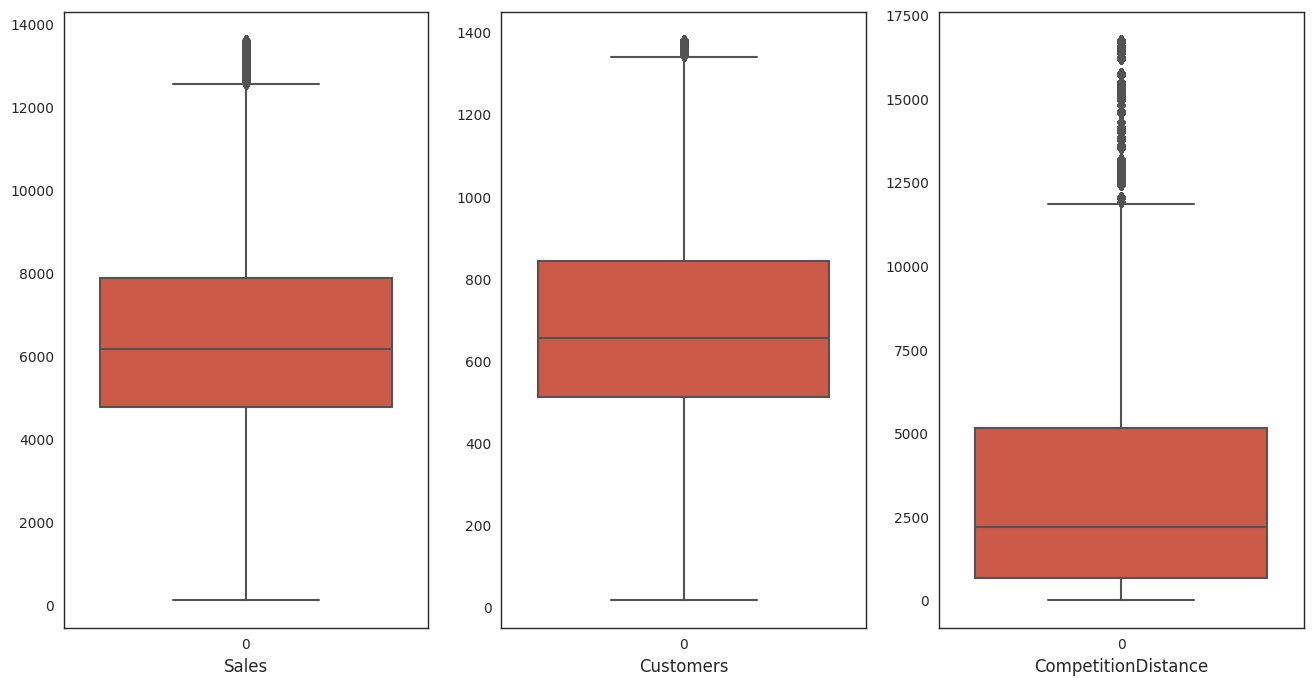

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (16,8))

sns.boxplot(df['Sales'], ax=ax[0]).set(xlabel='Sales')
sns.boxplot(df['Customers'], ax=ax[1]).set(xlabel='Customers')
sns.boxplot(df['CompetitionDistance'], ax=ax[2]).set(xlabel='CompetitionDistance')

In [ ]:
df = remove_outlier(df, 'Sales')
df = remove_outlier(df, 'Customers')
df = remove_outlier(df, 'CompetitionDistance')

In [ ]:
df = pd.get_dummies(df,columns=['StoreType','Assortment'])

In [ ]:
X = df.drop(['Sales','Store','Date','Year', 'WeekOfYear'] , axis = 1)
y= df.Sales

In [ ]:
X.shape

(713681, 15)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = [1, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
X_train, X_param_test, y_train, y_param_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=0)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, n_iter = 100, verbose=2, random_state=0)
# Fit the random search model
rf_random.fit(X_param_test, y_param_test)

In [ ]:
best_hyperparams = {'n_estimators': 1500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

rf = RandomForestRegressor(n_estimators = best_hyperparams['n_estimators'],
                           max_features = best_hyperparams['max_features'],
                           max_depth = best_hyperparams['max_depth'],
                           min_samples_split = best_hyperparams['min_samples_split'],
                           min_samples_leaf = best_hyperparams['min_samples_leaf'],
                           bootstrap = best_hyperparams['bootstrap'])

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.9112953785473328

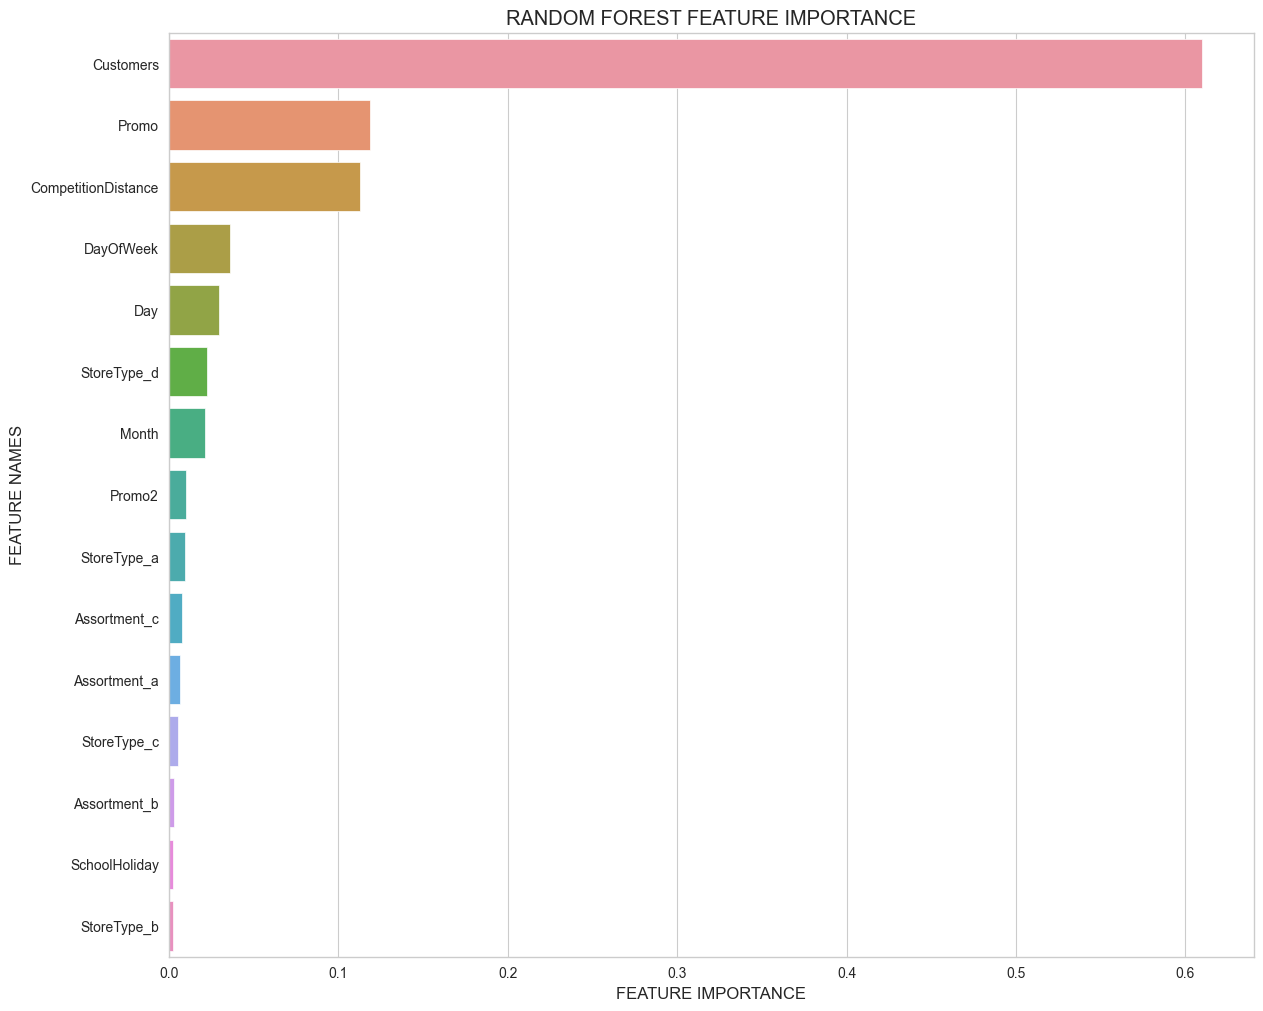

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(14,12))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

columns=df.drop(['Sales','Store','Date','Year', 'WeekOfYear'] , axis = 1).columns
plot_feature_importance(rf.feature_importances_,columns[:],'RANDOM FOREST')